In [252]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [253]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder

In [254]:
data_train = pd.read_csv('/kaggle/input/titanic/train.csv')
data_test = pd.read_csv('/kaggle/input/titanic/test.csv')
data = pd.concat([data_train, data_test], ignore_index=True, sort=False)

In [255]:
# data
print(data)

      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [256]:
# data shape
print(data.shape)

(1309, 12)


In [257]:
# data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


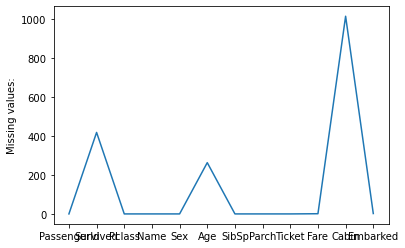

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


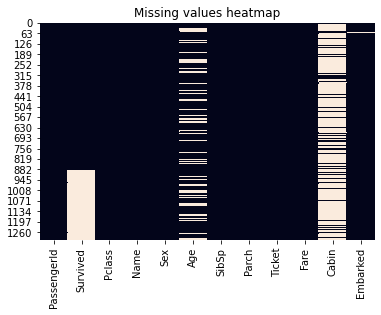

In [258]:
# Missing values
plt.ylabel("Missing values:")
plt.plot(pd.DataFrame(data.isnull().sum()))
plt.show()
print(data.isnull().sum())

sns.heatmap(data.isnull(), cbar=False).set_title("Missing values heatmap")
plt.show()

In [259]:
# PassengerId
# > Doesn't affect survived

# Survived
# > Validation

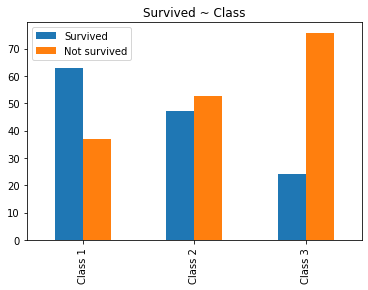

      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [263]:
# pclass


# pd.get_dummies(data.Pclass, prefix="pclass", drop_first = True)

pClass_1 = round(
    (data_train[data_train.Pclass == 1].Survived == 1).value_counts()[1] /
    len(data_train[data_train.Pclass == 1]) * 100, 2)
pClass_2 = round(
    (data_train[data_train.Pclass == 2].Survived == 1).value_counts()[1] /
    len(data_train[data_train.Pclass == 2]) * 100, 2)
pClass_3 = round(
    (data_train[data_train.Pclass == 3].Survived == 1).value_counts()[1] /
    len(data_train[data_train.Pclass == 3]) * 100, 2)

pClassDf = pd.DataFrame(
    {"Survived": {"Class 1": pClass_1,
                  "Class 2": pClass_2,
                  "Class 3": pClass_3},
     "Not survived": {"Class 1": 100 - pClass_1,
                      "Class 2": 100 - pClass_2,
                      "Class 3": 100 - pClass_3}})
pClassDf.plot.bar().set_title("Survived ~ Class")
plt.show()

print(data)

In [264]:
# Strong connection between classes and surviving

In [265]:
# Name
# > Doesn't affect survived

0       1
1       0
2       0
3       0
4       1
       ..
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64


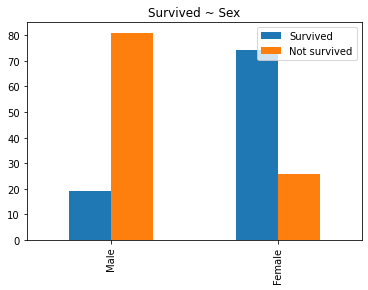

In [266]:
# Sex

# Missing

data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

print(data.Sex)

sex_1 = round(
    (data_train[data_train.Sex == 'male'].Survived == 1).value_counts()[1] /
    len(data_train[data_train.Sex == 'male']) * 100, 2)
sex_2 = round(
    (data_train[data_train.Sex == 'female'].Survived == 1).value_counts()[1] /
    len(data_train[data_train.Sex == 'female']) * 100, 2)

pClassDf = pd.DataFrame(
    {"Survived": {"Male": sex_1,
                  "Female": sex_2},
     "Not survived": {"Male": 100 - sex_1,
                      "Female": 100 - sex_2}})
pClassDf.plot.bar().set_title("Survived ~ Sex")
plt.show()

0


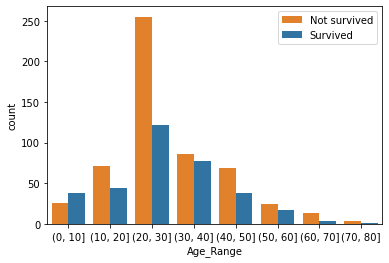

In [267]:
# Age

# Missing

grp = data.groupby(['Sex', 'Pclass'])
data.Age = grp.Age.apply(lambda x_: x_.fillna(x_.median()))

print(data.Age.isnull().sum())

data.Age.fillna(data.Age.median, inplace=True)


data['Age_Range'] = pd.cut(data.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])
sns.countplot(x="Age_Range", hue="Survived", data=data, palette=["C1", "C0"]).legend(labels=["Not survived", "Survived"])
plt.show()

0       1
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    1
Name: SibSp, Length: 1309, dtype: int64


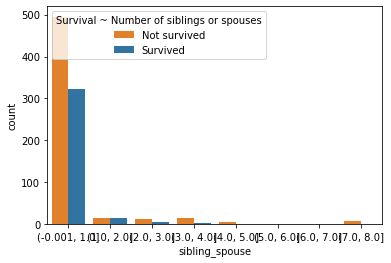

In [268]:
# SibSp

print(data.SibSp)

ss = pd.DataFrame()
ss['survived'] = data_train.Survived
ss['sibling_spouse'] = pd.cut(data_train.SibSp, [0, 1, 2, 3, 4, 5, 6, 7, 8], include_lowest=True)

x = sns.countplot(x="sibling_spouse", hue="survived", data=ss, palette=["C1", "C0"]).legend(
    labels=["Not survived", "Survived"])
x.set_title("Survival ~ Number of siblings or spouses")
plt.show()

0       0
1       0
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    1
Name: Parch, Length: 1309, dtype: int64


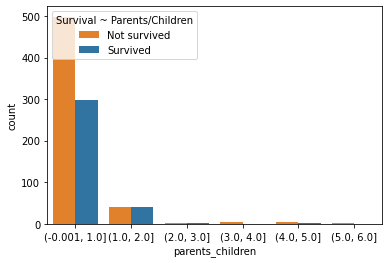

In [269]:
# Parch

print(data.Parch)

pc = pd.DataFrame()
pc['survived'] = data_train.Survived
pc['parents_children'] = pd.cut(data_train.Parch, [0, 1, 2, 3, 4, 5, 6], include_lowest=True)
x = sns.countplot(x="parents_children", hue="survived", data=pc, palette=["C1", "C0"]).legend(
    labels=["Not survived", "Survived"])

x.set_title("Survival ~ Parents/Children")
plt.show()

data['Family'] = data.Parch + data.SibSp
data['Is_Alone'] = data.Family == 0

In [270]:
# Ticket
# > Doesn't affect survived

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64


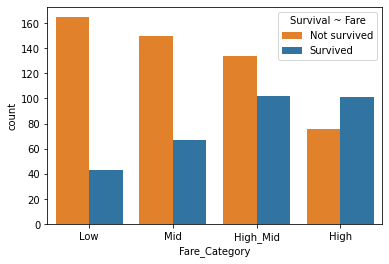

In [271]:
# Fare

print(data.Fare)

data['Fare_Category'] = pd.cut(data_train['Fare'], bins=[0, 7.90, 14.45, 31.28, 120], labels=['Low', 'Mid',
                                                                                                    'High_Mid', 'High'])
x = sns.countplot(x="Fare_Category", hue="Survived", data=data, palette=["C1", "C0"]).legend(
    labels=["Not survived", "Survived"])
x.set_title("Survival ~ Fare")

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object


Text(0.5, 1.0, 'Survival ~ Embarking.')

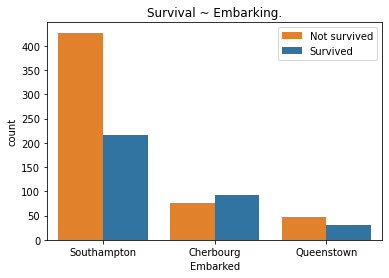

In [272]:
# Embarked

# Missing

data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)
pd.get_dummies(data.Embarked, prefix="Emb", drop_first = True)

print(data.Embarked)

p = sns.countplot(x="Embarked", hue="Survived", data=data_train, palette=["C1", "C0"])
p.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"])
p.legend(labels=["Not survived", "Survived"])
p.set_title("Survival ~ Embarking.")

In [273]:
# Cabin

# Missing

data.Cabin = data.Cabin.fillna('NA')

print(data.Cabin)

0         NA
1        C85
2         NA
3       C123
4         NA
        ... 
1304      NA
1305    C105
1306      NA
1307      NA
1308      NA
Name: Cabin, Length: 1309, dtype: object


In [274]:
data.drop(['Pclass', 'Fare','Cabin', 'Fare_Category','Name','Ticket','Embarked', 'Age_Range', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)

In [275]:
# Prediction

X_pred = data[data.Survived.isnull()].drop(['Survived'], axis=1)

In [276]:
# Training data

print(data)

train_data = data.dropna()
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

      PassengerId  Survived  Sex  Family  Is_Alone
0               1       0.0    1       1     False
1               2       1.0    0       1     False
2               3       1.0    0       0      True
3               4       1.0    0       1     False
4               5       0.0    1       0      True
...           ...       ...  ...     ...       ...
1304         1305       NaN    1       0      True
1305         1306       NaN    0       0      True
1306         1307       NaN    1       0      True
1307         1308       NaN    1       0      True
1308         1309       NaN    1       2     False

[1309 rows x 5 columns]


In [ ]:
# Random forest
# entropy
# gini

clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=600,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)


RF Accuracy: 71.51%


In [278]:
result = clf.predict(X_pred)
submission = pd.DataFrame({'PassengerId':X_pred.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions.csv
